In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nitropulse import BBCH

In [3]:
pheno = BBCH(workspace_dir='~/.nitropulse')
df = pheno.run()
print(df.shape)
df.head()

Local directory for RISMA data: ~/.nitropulse/inputs/RISMA_CSV_files
Seeded stations texture JSON to ~/.nitropulse/config/risma/stations_texture.json


Loading RISMA files: 0it [00:00, ?it/s]

KeyError: 'depth'

In [4]:
# save the DataFrame to a CSV file
df.to_csv('~/.nitropulse/outputs/bbch_df.csv', index=False)

In [5]:
import pandas as pd

df = pd.read_csv('~/.nitropulse/outputs/pheno_df.csv')
df.head()

,index,date,op,VH,VV,angle,lc,Station,station,depth,...,Sand,Silt,Clay,Classification,year,doy,BASE_TEMP,cum_GDD,BBCH,cum_SSM
0,0,2015-03-13 00:31:30,0,-21.0,-11.0,45.0,146,MB18,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,72,5.0,NaN,90.0,NaN
1,0,2015-03-13 00:31:30,0,-20.0,-10.0,45.0,146,MB19,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,72,5.0,NaN,90.0,NaN
2,0,2015-03-13 00:31:30,0,-24.0,-19.0,45.0,146,MB17,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,72,5.0,NaN,90.0,NaN
3,0,2015-03-13 00:31:30,0,-20.0,-13.0,45.0,34,MB16,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,72,NaN,NaN,NaN,NaN
4,0,2015-03-13 00:31:55,0,-19.0,-10.0,41.0,146,MB26,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,72,5.0,NaN,90.0,NaN


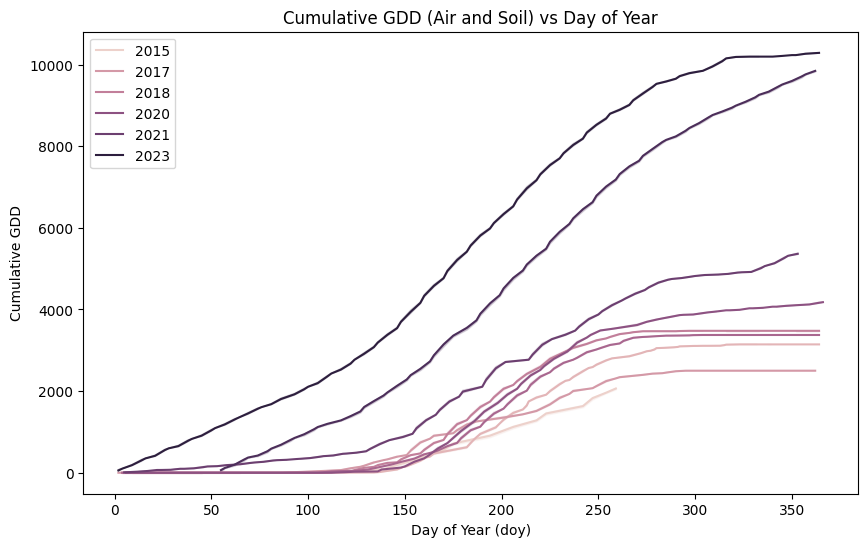

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='cum_GDD', data=df, hue='year')
plt.xlabel('Day of Year (doy)')
plt.ylabel('Cumulative GDD')
plt.title('Cumulative GDD (Air and Soil) vs Day of Year')
plt.legend()
plt.show()

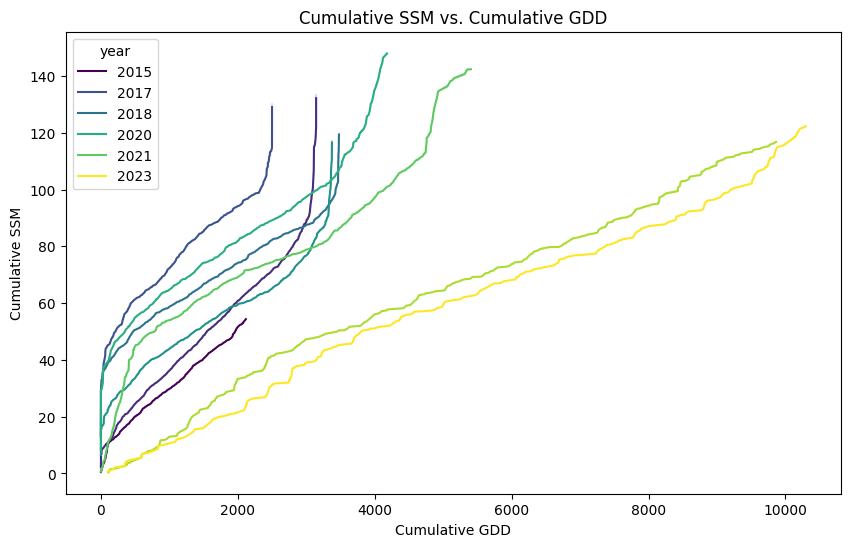

In [7]:
# Create the line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='cum_GDD', y='cum_SSM', hue='year', data=df, palette='viridis')  # Use 'year' for color
plt.xlabel('Cumulative GDD')
plt.ylabel('Cumulative SSM')
plt.title('Cumulative SSM vs. Cumulative GDD')
plt.show()

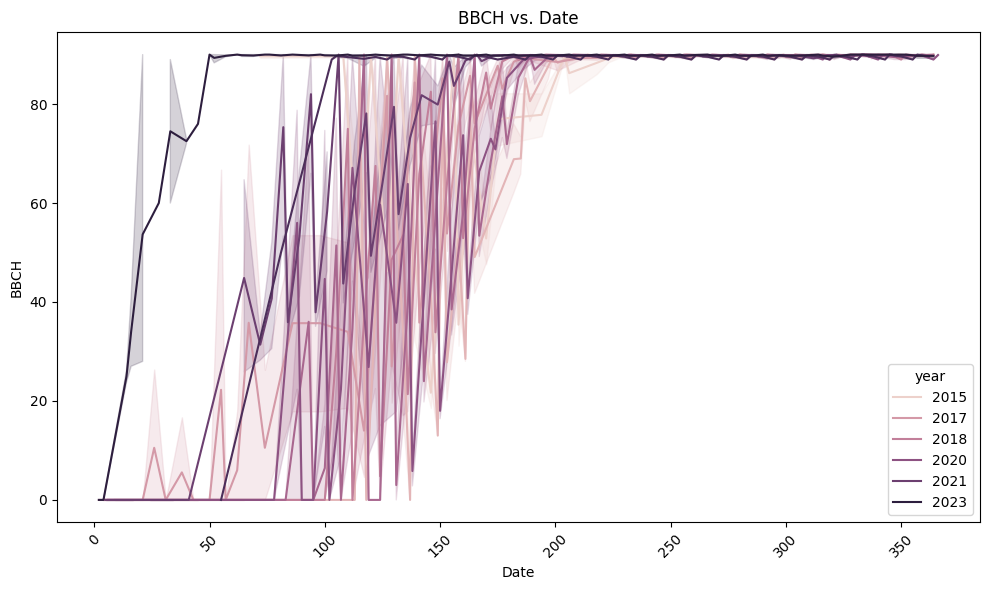

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='BBCH', data=df, hue='year')
plt.xlabel('Date')
plt.ylabel('BBCH')
plt.title('BBCH vs. Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()